<CENTER>
    <a href="http://opendata.atlas.cern" class="icons" src="./pictures/ATLASOD.gif" Style="width:50%"></a>
</CENTER>

[![git](./pictures/ATLASOD.gif)](http://opendata.atlas.cern)

<center> 
    
# Reconstrucción de la Masa invariante del Bosón Z en dos canales de decaimiento; $Z^{0} \rightarrow \mu^{-}+\mu^{+}$ y $Z^{0} \rightarrow e^{-}+e^{+}$
</center>

![Decaimiento](./pictures/Decay_Z.jpg)

------------------------------------
## Introducción.
El bosón Z, y los bosones cargados electrónicamente $W^{+}$ y $W^{-}$ son los mediadores de la [interacción nuclear débil](https://en.wikipedia.org/wiki/Weak_interaction), una de las cuatro [interacciones fundamentales](https://es.wikipedia.org/wiki/Interacci%C3%B3n_fundamental) de la naturaleza. El bosón Z tiene las siguientes propiedades:
 - Es eléctricamente neutro y [es su propia antipartícula](https://en.wikipedia.org/wiki/Real_neutral_particle).
 - Su espín es 1.
 - Tiene una [vida media](https://en.wikipedia.org/wiki/Half-life) de aproximadamente $3*10^{-25}s$.
 - Una masa de $m=91.18GeV$.
 
Debido a que el bosón Z tiene una vida media muy corta, no existe ningún instrumento capaz de dectectarlo en ese pequeño espacio de tiempo, pero lo podemos "ver" por medio de sus decaimientos. Naturalmente, las leyes de la naturaleza deben ser seguidas también en el proceso de la desintegración del Z. Esto significa, entre otras cosas, que ya que el bosón tiene carga neutra , la carga de los productos de desintegración debe ser igual a cero. Así si un bosón Z decae en dos partículas, éstas deben ser siempre un par partícula-antipartícula. Sumando todos los tipos permitidos de combinaciones de leptones y quarks conduce a [24 posibilidades](https://atlas.physicsmasterclasses.org/en/zpath_lhcphysics2.htm). Sin embargo, en este notebook nos enfocaremos solamente en dos de los productos de desintegración más "fácil" de dectetar, a saber
- par electrón-positrón
- par muón-antimuón

Por otra parte, el [Gran Colisionador de Hadrones (LHC)](https://en.wikipedia.org/wiki/Large_Hadron_Collider) acelera y dirige trillones de protones para colisionar con otros trillones de protones y debido a que los  protones colisionan con tanta energía se generan un chorro de partículas (las que forman materia ordinaria y otras que sólo existían justamente tras el Big Bang) en cada evento. Ahora bien, debido a que en cada evento (colisión protón-protón) se generan muchas partículas, debemos usar cortes para seleccionar los eventos de nuestro interés, es decir, eventos del bosón Z. Los criterios o cortes de selección de eventos para el bosón Z son:
- Exactamente dos buenos leptones con $p_{T}>25$
- Leptones con carga opuesta.
- Leptones con el mismo sabor.
- $|m_{ll}-m_{Z}|<20GeV$

 Aplicados estos criterios en el análisis, podemos calcular la masa invariante de los leptones seleccionados, es decir, la masa invariante del bosón Z por medio de la siguiente [expresión](https://en.wikipedia.org/wiki/Invariant_mass)
 
 $$M^2=2.p_{Tlep1}.p_{Tlep2}(\cosh{(\eta_{lep1}-\eta_{lep2})}-\cos{(\phi_{lep1}-\phi_{lep2}})$$
 
 Sin embargo, en el análisis de este notebook no se utiliza la expresión anterior, sino se utiliza los [TLorentzVector](https://root.cern.ch/doc/master/classTLorentzVector.html).

------------------------------

Necesitamos incluir algunas bibliotecas estándar de C++ y ROOT

In [1]:
#include <iostream> 
#include <string> 
#include <stdio.h> 
#include <time.h>
using namespace std;

--------------------------
Como vamos usar más de un archivo de entrada .root, la mejor opción es usar un objeto [TCHAIN](https://root.cern.ch/doc/master/classTChain.html). Esto permite "encadenar" varias muestras en una sola estructura que luego podemos correr.

In [2]:
TChain *MonteCarlo = new TChain("mini");

Vamos a usar dos dataset de Monte Carlos directamente desde la máquina local (debido a problemas de conectividad a internet), sin embargo, se deja comentado los datasets extraido directamente de internet para el que quiera trabajar online.  

In [3]:
MonteCarlo->Add("/home/rufisica/Documentos/Cevale2_VE/Repositories/Dataset/MC/mc_147770.Zee.root");
MonteCarlo->Add("/home/rufisica/Documentos/Cevale2_VE/Repositories/Dataset/MC/mc_147771.Zmumu.root");
/*
MonteCarlo->Add("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root ");
MonteCarlo->Add("http://opendata.atlas.cern/release/samples/MC/mc_147771.Zmumu.root");
*/

-------------------
Con **ROOT Prompt Kernel** debemos extraer las variables que se van usar para el análisis. Para mayor información sobre el nombre y significado de las variables que se guardan en los dataset, chequear la página 46 de [Review of the ATLAS Open Data Dataset](https://cds.cern.ch/record/2203649/files/ATL-OREACH-PUB-2016-001.pdf).

Vamos a extraer las variables genéricas, como RunNumber. Esta variable nos ayuda a identificar la muestra (para nuestro caso, si son electrones o muones) dentro del código de análisis.

In [4]:
Int_t MonteCarlo_runNumber = -1; 

Ahora vamos a extraer las variables de los leptones

In [5]:
Int_t  MonteCarlo_lep_n,           // Número de leptones por evento.
       MonteCarlo_lep_type[5];     // Número que identifica el tipo de lepton (e,mu,tau)

Float_t  MonteCarlo_lep_pt[5],     // Momento transverso del lepton
         MonteCarlo_lep_charge[5], // Carga del lepton
         MonteCarlo_lep_eta[5],    // pseudorapidity del lepton
         MonteCarlo_lep_phi[5],    // Angulo azimutal del lepton
         MonteCarlo_lep_E[5];      // Energía del lepton

Seguidamente vamos a llenar las variables definidas anteriormente con el contenido de las ntuplas de entrada

In [6]:
MonteCarlo->SetBranchAddress("channelNumber", &MonteCarlo_runNumber);
MonteCarlo->SetBranchAddress("lep_pt",        &MonteCarlo_lep_pt);
MonteCarlo->SetBranchAddress("lep_charge",    &MonteCarlo_lep_charge);
MonteCarlo->SetBranchAddress("lep_n",         &MonteCarlo_lep_n);
MonteCarlo->SetBranchAddress("lep_type",      &MonteCarlo_lep_type);
MonteCarlo->SetBranchAddress("lep_eta",       &MonteCarlo_lep_eta);
MonteCarlo->SetBranchAddress("lep_phi",       &MonteCarlo_lep_phi);
MonteCarlo->SetBranchAddress("lep_E",         &MonteCarlo_lep_E);

------------------
Vamos a crear seis (6) histogramas para los resultados de la masa invariante, el momento transverso y la energía del bosón Z en cada canal. 

In [7]:
// Definición de histogramas de masa invariante
TH1F *h_M_Zee = new TH1F("h_M_Zee","Invariant Mass of the Z (Zee);M_Zee [GeV];#Events",100,0,125);
TH1F *h_M_Zmm = new TH1F("h_M_Zmm","Invariant Mass of the Z (Zmm); M_Zmm [GeV];#Events",100,0,125);

// Definición de histograma del pt
TH1F *h_pt_Zee = new TH1F("h_pt_Zee","Transverse Moment of Z (Zee); pt_Zee [GeV];#Events ",50,0,100);
TH1F *h_pt_Zmm = new TH1F("h_pt_Zmm","Transverse Moment of Z (Zmm);pt_Zmm [GeV];#Events",50,0,100);

// Definición de histograma de Energía
TH1F *h_E_Zee = new TH1F("h_E_Zee","Z Energy (Zee);E_Zee [GeV];#Events",100,60,500);
TH1F *h_E_Zmm = new TH1F("h_E_Zmm","Z Energy (Zmm);E_Zmm [GeV];#Events",100,60,500);

Ahora..... cuestiones de estética

In [8]:
h_M_Zee->SetMarkerSize(2);         h_M_Zmm->SetMarkerSize(2);
h_M_Zee->SetFillColor(kBlue-5);    h_M_Zmm->SetFillColor(kRed-5);
h_M_Zee->SetLineColor(kBlue);      h_M_Zmm->SetLineColor(kRed);

h_pt_Zee->SetMarkerSize(2);        h_pt_Zmm->SetMarkerSize(2);
h_pt_Zee->SetFillColor(kBlue-5);   h_pt_Zmm->SetFillColor(kRed-5);
h_pt_Zee->SetLineColor(kBlue);      h_pt_Zmm->SetLineColor(kRed);

h_E_Zee->SetMarkerSize(2);         h_E_Zmm->SetMarkerSize(2);
h_E_Zee->SetFillColor(kBlue-5);    h_E_Zmm->SetFillColor(kRed-5);
h_E_Zee->SetLineColor(kBlue);      h_E_Zmm->SetLineColor(kRed);

----------------
Vamos aplicar los criterios de selección de eventos.

In [9]:
int nentries, nbytes, i;
int events_analyzed=0;
float Z_pt, Z_E;

nentries=(Int_t)MonteCarlo->GetEntries();

cout<<"Número total de entradas para analizar: "<<nentries<<endl;

for (i=0;i<nentries;i++){
    
    nbytes=MonteCarlo->GetEntry(i);
    
    //Corte #1: Exactamente dos buenos leptones con pT>25GeV
    if (MonteCarlo_lep_n==2 && MonteCarlo_lep_pt[1]>25000) {
        
        // Corte #2: Los dos leptones seleccionados deben tener carga opuesta
        if (MonteCarlo_lep_charge[0] != MonteCarlo_lep_charge[1]){
            
            // Corte #3: Los dos leptones deben tener el mismo sabor
            if (MonteCarlo_lep_type[0] == MonteCarlo_lep_type[1]){
                
                // Definición de TLorentzVector
                TLorentzVector l1 = TLorentzVector();
                TLorentzVector l2 = TLorentzVector();
        
                l1.SetPtEtaPhiE(MonteCarlo_lep_pt[0]/1000, MonteCarlo_lep_eta[0],MonteCarlo_lep_phi[0],MonteCarlo_lep_E[0]/1000);
                l2.SetPtEtaPhiE(MonteCarlo_lep_pt[1]/1000, MonteCarlo_lep_eta[1],MonteCarlo_lep_phi[1],MonteCarlo_lep_E[1]/1000);
                
                // Calculo de la masa invariante usando vectores de TLorentz
                TLorentzVector l12=l1+l2;
                
                float InvMass=l12.M();
                
                /* Corte #4: El valor absoluto de la diferencia de masa entre los dos 
                leptones y la masa conocida del bosón Z debe ser menor a 20GeV */ 
                if (TMath::Abs(InvMass-91.18)<20){
                    
                     Z_pt = MonteCarlo_lep_pt[0]-MonteCarlo_lep_pt[1]; // Pt de Z
                     Z_E = MonteCarlo_lep_E[0]+MonteCarlo_lep_E[1];   // Energía de Z
                    
                    events_analyzed++;
                    
                    // El valor de runNumber nos ayuda a separar las muestras
                    if(MonteCarlo_runNumber==147770) // donde 147770==Zee 
                    {
                        h_M_Zee->Fill(InvMass); // Masa invariante de los dos electrones
                        h_pt_Zee->Fill(Z_pt/1000);   // Momento transverso del Bosón Z en el canal (ee)
                        h_E_Zee->Fill(Z_E/1000);     // Energía del Bosón Z en el canal (ee)
                    }
                    else if (MonteCarlo_runNumber==147771) // Donde 147771=Zmm
                    {
                        h_M_Zmm->Fill(InvMass); // Masa invariante de los dos muones
                        h_pt_Zmm->Fill(Z_pt/1000);   // Momento transverso del Bosón Z en el canal (mm)
                        h_E_Zmm->Fill(Z_E/1000);     // Energía del bosón Z en el canal (mm)
                    }
                    
                }
            }
        }
    }
}

cout<<"Número de eventos analizados: "<<events_analyzed<<endl;

Número total de entradas para analizar: 15000000
Número de eventos analizados: 6842021


---------------

Vamos a crear las [TCanvas](https://root.cern.ch/doc/master/classTCanvas.html)  y a graficar los histogramas con los resultados del análisis anterior

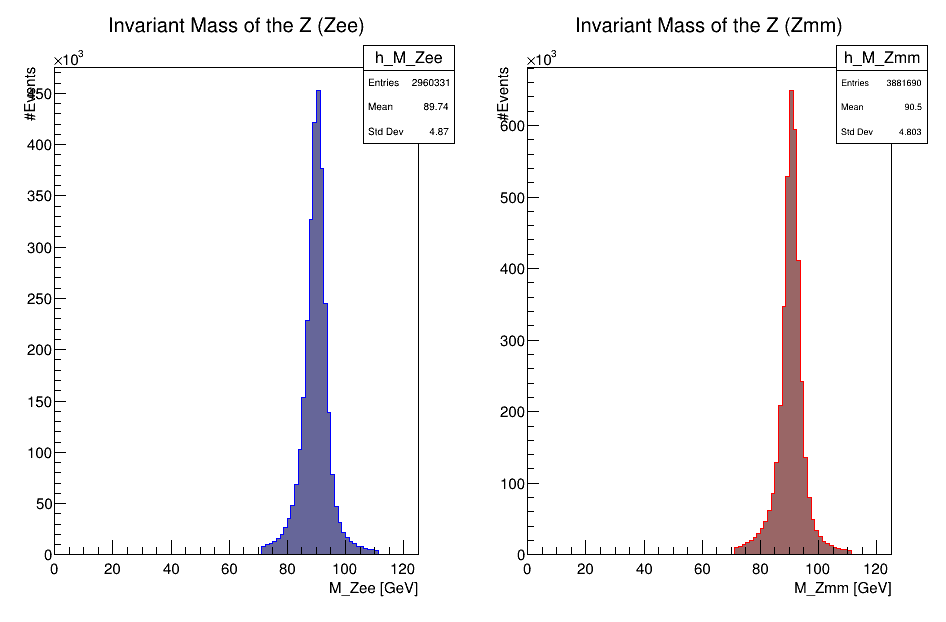

In [10]:
TCanvas *c1 = new TCanvas("c1","c1",10,10,950,650);
    //TText tz; tz.SetTextFont(42); tz.SetTextAlign(21);
    c1->Divide(2,1);
    c1->cd(1); h_M_Zee->Draw();
    c1->cd(2); h_M_Zmm->Draw();
c1->Draw();

**Figura 1:** De izquierda a derecha se muestra: la masa invariante del Bosón Z cuando decae en el canal ($ee$)  ($Z^0 \rightarrow e^{+}+e^{-}$) y la masa invariante del Bosón Z cuando decae en el canal ($\mu\mu$)  ($Z^0 \rightarrow \mu^{+}+\mu^{-}$).

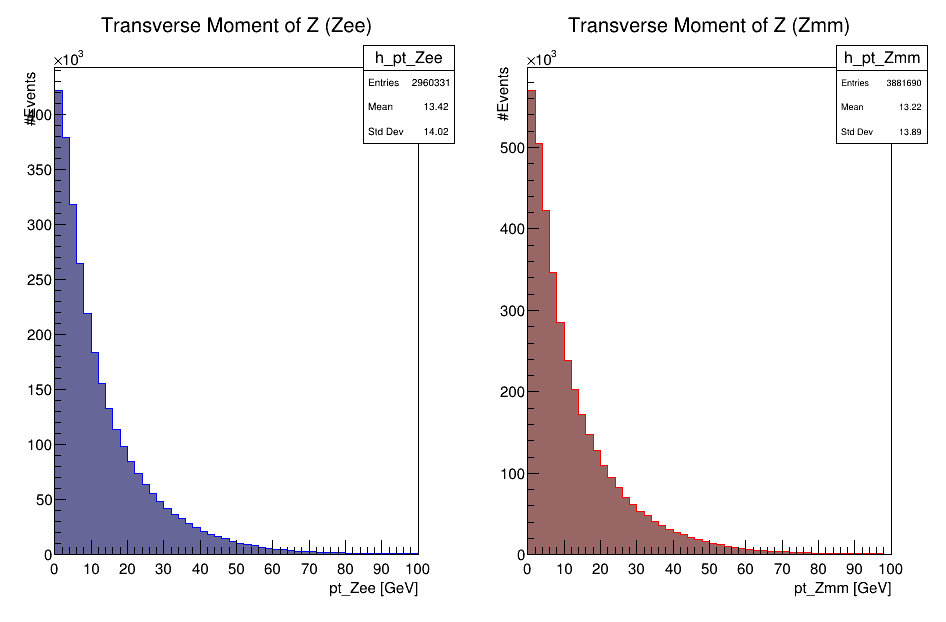

In [11]:
TCanvas *c2 = new TCanvas("c2","c2",10,10,950,650);
    //TText tz; tz.SetTextFont(42); tz.SetTextAlign(21);
    c2->Divide(2,1);
    c2->cd(1); h_pt_Zee->Draw();
    c2->cd(2); h_pt_Zmm->Draw();
c2->Draw();

**Figura 2:** De izquierda a derecha se muestra: el momento transverso del Bosón Z cuando decae en el canal ($ee$)  ($Z^0 \rightarrow e^{+}+e^{-}$) y el momento transverso del Bosón Z cuando decae en el canal ($\mu\mu$)  ($Z^0 \rightarrow \mu^{+}+\mu^{-}$).

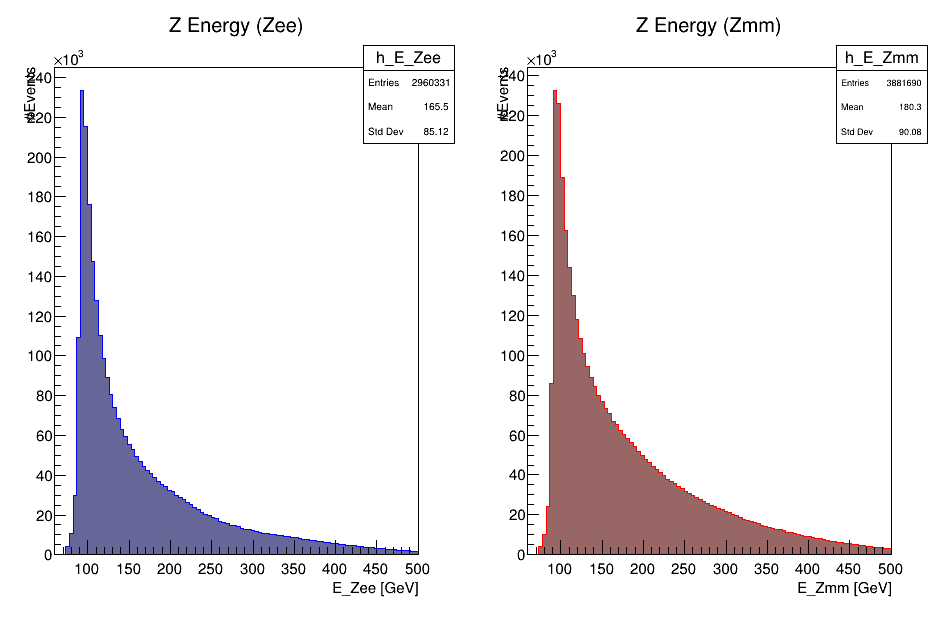

In [12]:
TCanvas *c3 = new TCanvas("c3","c3",10,10,950,650);
    //TText tz; tz.SetTextFont(42); tz.SetTextAlign(21);
    c3->Divide(2,1);
    c3->cd(1); h_E_Zee->Draw();
    c3->cd(2); h_E_Zmm->Draw();
c3->Draw();

**Figura 3:** De izquierda a derecha se muestra: la energía del Bosón Z cuando decae en el canal ($ee$)  ($Z^0 \rightarrow e^{+}+e^{-}$) y la energía del Bosón Z cuando decae en el canal ($\mu\mu$)  ($Z^0 \rightarrow \mu^{+}+\mu^{-}$).